# Project Euler Problem 3
The prime factors of $13195$ are $5, 7, 13$ and $29$.

What is the largest prime factor of the number $600851475143$?

---
There may be a more subtle way to do this, but here's the naive approach:

In [55]:
# I found this idea somewhere online a while ago. The idea is to do the sieve of Eratosthanes
# while keeping the list of composites as small as possible to save memory
def genPrimes(n):
    composites = dict()
    for i in range(2,n//2+1):
        if i not in composites:
            yield i
            composites[i*i] = set()
            composites[i*i].add(i)
        else:
            for j in composites[i]:
                nextMultiple = i + j
                if nextMultiple not in composites:
                    composites[nextMultiple] = set()
                composites[nextMultiple].add(j)
            del composites[i]

The generator above will generate all the possible divisors of $n$, but then we need to see which of them are actual divisors.

To speed up the computation, we divide out prime factors as they arise. When the result is equal to one of our primes we are done.

In [61]:
def f(n):
    primes = genPrimes(n)
    for p in primes:
        if n % p == 0:
            if n == p:
                return p
            else:
                while n%p == 0 and n != p:
                    n = n/p
                if n == p:
                    return p
f(600851475143)

6857

---
## Speed and space analysis
This kind of computation will certainly be useful in the future. I should figure out where the limits are.

In [62]:
%timeit f(10)
%timeit f(10000)
%timeit f(10000000)

2.31 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.89 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.36 s ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
%timeit f(600851475143)

5.51 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<IPython.core.display.Javascript object>


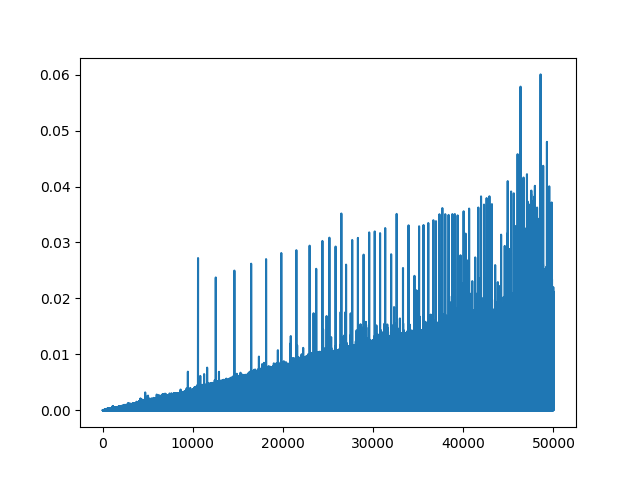

In [63]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time

ys = []
for i in range(50000):
    start = time.time()
    f(i)
    ys.append(time.time()-start)

plt.plot(ys)
plt.show()

In [77]:
%timeit f(10)
#%timeit f(21839)
#%timeit f(21840)

6.16 µs ± 79.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


These functions might be useful in the future:

In [46]:
def primeFactors(n):
    factors = dict()
    primes = genPrimes(n)
    
    for p in primes:
        if n % p == 0:
            if n == p:
                
                # base case -- last factor
                if p not in factors:
                    factors[p] = 0
                factors[p] += 1
                return factors
            else:
                # divide out the prime (power) and continue
                factors[p] = 0
                while n%p == 0 and n != p:
                    n = n/p
                    factors[p] += 1
                if n == p:
                    factors[p] += 1
                    return factors

    if len(factors) == 0:
        return {n:1}

In [47]:
def getPrimeDecomposition(n):
    factors = primeFactors(n)
    s = str(n) + ' = '
    for p in factors:
        s += str(p) 
        if factors[p] > 1:
            s += '^' + str(factors[p]) 
        s += ' x '
    return s[:-3]

In [ ]:
getPrimeDecomposition(999999999998)

<IPython.core.display.Javascript object>


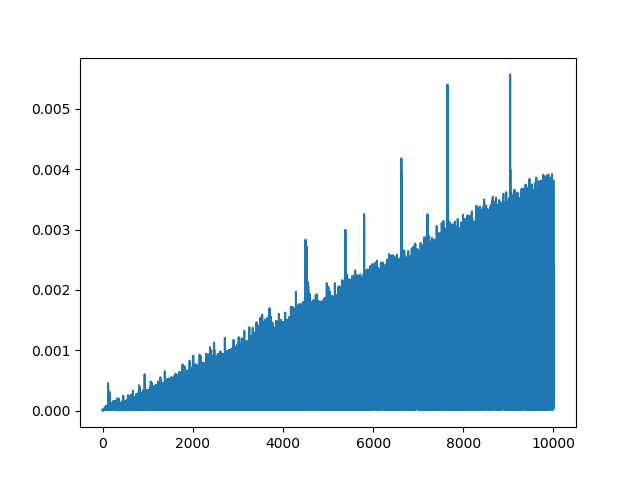

In [58]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time

ys = []
for i in range(10000):
    start = time.time()
    getPrimeDecomposition(i)
    ys.append(time.time()-start)

plt.plot(ys)
plt.show()

This looks roughly linear! This time the spikes correspond to primes in which we have to run through every prime less than $n$.

In [60]:
import numpy as np

xs = list(range(10000))
print("Slope here is %s" % np.polyfit(xs, ys, 1)[0])

Slope here is 1.0056888801960104e-07


## Alternative Prime Generation
I would love to see if I could generate primes more quickly. I'm going to continue doing this in another sheet.